# Dynamic Programming

In this notebook, we'll explore solving the Longest Increasing Subsequence problem and the Longest Path on DAGs problem using dynamic programming.

### If you're using Datahub:
* Run the cell below **and restart the kernel if needed**

### If you're running locally:
You'll need to perform some extra setup.
#### First-time setup
* Install Anaconda following the instructions here: https://www.anaconda.com/products/distribution 
* Create a conda environment: `conda create -n cs170 python=3.11`
* Activate the environment: `conda activate cs170`
    * See for more details on creating conda environments https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html
* Install pip: `conda install pip`
* Install jupyter: `conda install jupyter`

#### Every time you want to work
* Make sure you've activated the conda environment: `conda activate cs170`
* Launch jupyter: `jupyter notebook` or `jupyter lab` 
* Run the cell below **and restart the kernel if needed**

In [18]:
# Install dependencies
!pip install -r requirements.txt --quiet

In [19]:
import otter
assert (otter.__version__ >= "5.5.0"), "Please reinstall the requirements and restart your kernel."

grader = otter.Notebook("hw06.ipynb")
import time
import tqdm
import pickle
import numpy as np
import networkx as nx

test_cases = pickle.load(open("generated_testcases.pkl", "rb"))

rng_seed = 0

### Q1. Longest Increasing Subsequence

First implement the longest increasing subsequence. The algorithm is explained here https://people.eecs.berkeley.edu/~vazirani/algorithms/chap6.pdf#page=3.

The algorithm discussed in lecture and the textbook only returns the length of the longest increasing subsequence. Here we want you to return the actual subsequence (the actual list of elements). To find the actual subsequence, it may be useful to maintain an array seperate from the dp array which can be used to reconstruct the actual sequence.

In [20]:
def longest_increasing_subsequence (arr, n):
    """
    Return a list containing longest increasing subsequence of the array.
    If there are ties, return any one of them.
    
    args:
        arr:List[int] = an array of integers
        n:int = an int representing the length of arr
    
    return: 
        List[int] Containing the longest increasing subsequence. Return the actual 
        elements, not the indices of the elements.
    """
    f = [1 for _ in range(n)]
    pre = [None for _ in range(n)]

    for i in range(n):
        if i == 0:
            continue
        for j in range(i):
            if arr[i] > arr[j]:
                if f[i] < f[j] + 1:
                    f[i] = f[j] + 1
                    pre[i] = j
        # print(f"{i}: {f[i]}")    


    max_len = max(f)
    lst_pos = f.index(max_len)
    
    res = []
    while lst_pos is not None:
        res.append(arr[lst_pos])
        lst_pos = pre[lst_pos]
    res.reverse()
    
    return res

In [21]:
arr = [1, -1, 0, 3, 2, 1, 9, 3, 4, 10]

longest_increasing_subsequence(arr, len(arr))

[-1, 0, 2, 3, 4, 10]

In [22]:
def check_subsequence(seq, arr):
    for i in range(len(seq) - 1):
        assert seq[i] < seq[i + 1], f"Your subsequence is not strictly increasing: {seq}"

    index = 0
    matched = 0
    while matched < len(seq) and index < len(arr):
        if seq[matched] == arr[index]:
            matched += 1
        index += 1
    assert matched == len(seq), f"your list is not a valid subsequence of the input list."
assert tqdm is not None

problems = test_cases['q1']
for arr, sol in tqdm.tqdm(problems, total=len(problems)):
    student_sol = longest_increasing_subsequence(arr, len(arr))

    assert len(student_sol) == len(sol), f"""The length of your list differs from the solution. Your list {student_sol}, the solution {sol}"""
    check_subsequence(student_sol, arr)


100%|██████████| 358/358 [00:01<00:00, 261.25it/s] 


__Note: your solution should not take inordinate amounts of time to run. If it takes more than 10 seconds to run, it is too slow__

__We will also check submissions for hardcoded solutions.__

In [23]:
grader.check("LIS")

100%|██████████| 358/358 [00:01<00:00, 231.40it/s] 


LIS results: All test cases passed!

### Representing graphs in code (Part 2!!!)
Unlike last week's assignment, our graphs are now weighted, so we'll need to store weights alongside the edge information. Using an edge list representation, we can represent directed edges $(u, v)$ with weight $w$ by creating a list of tuples `(u, v, w)`.

However, like last week, we'd like to represent our graph using adjacency lists. We can represent the directed edge $(u, v)$ with weight $w$ by storing the tuple `(v, w)`  in `adj_list[u]`.


In [24]:
def generate_adj_list(n, edge_list):
    """
    args:
        n:int = number of nodes in the graph. The nodes are labelled with integers 0 through n-1
        edge_list:List[Tuple[int,int,int]] = edge list where each tuple (u,v,w) represents the directed 
            and weighted edge (u,v,w) in the graph
    return:
        A List[List[Tuple[int, int]]] representing the adjacency list 
    """
    adj_list = [[] for i in range(n)] 
    for u, v, w in edge_list:
        adj_list[u].append((v, w))
    for nodes in adj_list:
        nodes.sort()
    return adj_list

def draw_graph(adj_list):
    """Utility method for visualizing graphs

    args:
        adj_list (List[List[Tuple[int, int]]]): adjacency list of the graph given by generate_adj_list
    """
    G = nx.DiGraph()
    for u in range(len(adj_list)):
        for v, w in adj_list[u]:
            G.add_edge(u, v, weight=w)
    nx.draw(G, with_labels=True)

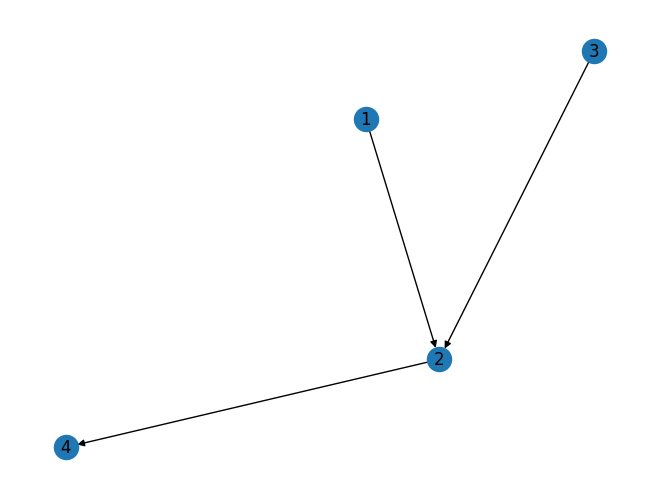

In [25]:
edges = [(1,2,5), (2,4,1), (3,2,5)]
adj = generate_adj_list(4, edges)

draw_graph(adj)

### Q2. Longest (Simple) Path in DAGS
It is thought that on general graphs, there is no efficient algorithm to solve the Longest Simple Path problem on general graphs. The main reason for this difficulty is that it is generally difficult to make an algorithm that ignores cycles in a graph.

However, there is an efficient dynamic programming algorithm to find the longest path on DAGs, since these graphs have no cycles. Specifically, the way to find longest paths on a DAG is the exact same as finding the shortest path on a DAG, except at each step you take the maximum rather than minimum distance. See https://people.eecs.berkeley.edu/~vazirani/algorithms/chap6.pdf for more details.

In this context, "longest" means largest sum of edge weights, regardless of the number of edges in the path.

You may assume all test cases are directed acyclic graphs, so you don't need to check for cycles. Some test cases are already topologoically sorted for you, but others are not. Feel free to use code from previous homeworks to help you. 

In [33]:
...
def longest_path_on_DAGS(adj_list):
    """
    Return a list containing the longest path on the dag. If there are ties, return 
    any such path. If there are none, return the empty list.
    
    args:
    adj_list: an adjacency list representing the DAG.
    
    return: the longest path as a list of nodes the list [a, b, c, d, e] correspondes 
            to the path a -> b -> c -> d -> e
    """
    n = len(adj_list)
    for edges in adj_list:
        for node, _ in edges:
            n = max(n, node)

    n += 1
    for _ in range(len(adj_list), n):
        adj_list.append([])

    in_deg = [0 for _ in range(n)]

    for node in range(n):
        for nxt, _ in adj_list[node]:
            in_deg[nxt] += 1       

    topo_order = []
    queue = [u for u in range(n) if in_deg[u] == 0]
    while queue:
        u = queue.pop(0)
        topo_order.append(u)
        for v, _ in adj_list[u]:
            in_deg[v] -= 1
            if in_deg[v] == 0:
                queue.append(v)


    f = [0 for _ in range(n)]
    prev = [None for _ in range(n)]

    for u in topo_order:
        for v, w in adj_list[u]:
            if f[v] < f[u] + w:
                f[v] = f[u] + w
                prev[v] = u

    max_len = 0
    tail = None

    max_len = max(f)
    tail = f.index(max_len)
    
    res = []
    while tail is not None:
        res.append(tail)
        tail = prev[tail]

    res.reverse()

    return res

[[], [(2, -1)], [(3, -3), (4, 4)], [(4, 5)]]


[3, 4]

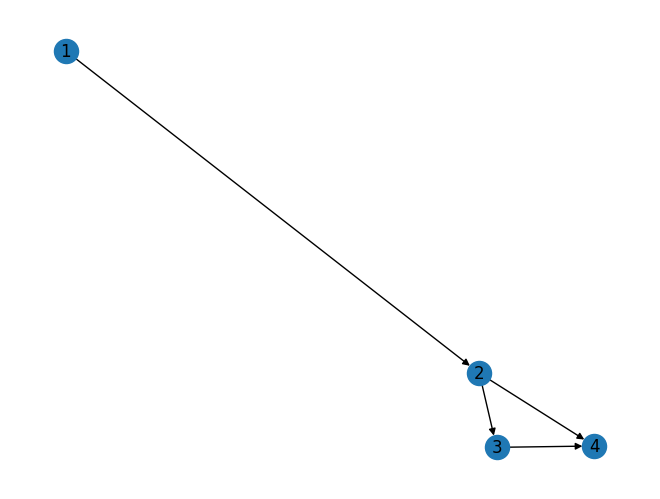

In [34]:
edges = [(1,2,-1), (2,3,-3), (3,4,5), (2,4,4)]
adj = generate_adj_list(4, edges)
print(adj)
draw_graph(adj)

longest_path_on_DAGS(adj)

In [35]:
problems = test_cases['q2']
for adj_list in tqdm.tqdm(problems, total=len(problems)):
    G = nx.DiGraph({u: {v: {'weight': w} for v, w in neighbors} for u, neighbors in enumerate(adj_list)})

    # bans networkx
    nxall = nx
    def error(*args, **kwargs):
        nx = nxall
        raise Exception("You may not call any graph libraries, modules, or functions.")
    nx = error

    try:
        path = longest_path_on_DAGS(adj_list)
    finally: 
        nx = nxall 

    # checks that the path returned is a real path in the graph and that it starts and ends 
    # at the right vertices
    assert nx.is_simple_path(G, path), f"your algorithm did not return a valid simple path"

    # checks that the path returned is the longest path
    opt_path_length = nx.dag_longest_path_length(G)
    student_path_length = sum(G[path[i]][path[i+1]]['weight'] for i in range(len(path)-1))
    assert student_path_length == opt_path_length, f"your algorithm did not return the shortest path: {student_path_length} vs {opt_path_length}"
    

100%|██████████| 21/21 [00:00<00:00, 1986.70it/s]


In [36]:
grader.check("DAG-longest-path")

100%|██████████| 20/20 [01:56<00:00,  5.82s/it]


DAG-longest-path results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit.

In [37]:
grader.export(pdf=False, force_save=True, run_tests=True)

<IPython.core.display.Javascript object>

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    LIS results: All test cases passed!

    DAG-longest-path results: All test cases passed!
